# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)


import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
sys.path.append('/home/ubuntu/udacity/deep-reinforcement-learning/p2_navigation/Reacher_Linux/')
sys.path.append('/home/ubuntu/Unity/ml-agents/ml-agents')
sys.path.append("/home/ubuntu/udacity/deep-reinforcement-learning/python/")
from unityagents import UnityEnvironment

# check and use GPU if available if not use CPU
device  = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=1)

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='/home/ubuntu/udacity/deep-reinforcement-learning/p2_continuous-control/Reacher_Linux/Reacher.x86_64', worker_id=2, no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
!pwd

/home/ubuntu/udacity/deep-reinforcement-learning/p2_continuous-control


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [6]:
# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

Number of agents: 1


In [7]:
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

Size of each action: 4


In [8]:
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

###  Continuous Control wtih Deep Deterministic Policy Gradients

In [9]:

BUFFER_SIZE    = int(1e6) # replay buffer size
BATCH_SIZE     = 1024      # minibatch size
GAMMA          = 0.99     # discount factor
TAU            = 1e-3     # for soft update of target parameters
LR_ACTOR       = 1e-4     # learning rate of the actor 
LR_CRITIC      = 3e-4     # learning rate of the critic
WEIGHT_DECAY   = 0.0001   # L2 weight decay
UPDATE_EVERY   = 5        # how often to update the network
EXPLORE_NOISE  = 0.05

FC1_UNITS      = 768
FC2_UNITS      = 1024
FC3_UNITS      = 64
seed           = 0

#### NN Model

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)


class ActorNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed=42, fc1_units=300, fc2_units=400, fc3_units=128):

        super(ActorNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        #self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc3 = nn.Linear(fc2_units, action_size)


        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        #self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        
    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        return torch.tanh(self.fc3(x))
    
    
class CriticNetwork(nn.Module):
    """Critic (Policy) Model."""

    def __init__(self, state_size, action_size, seed=42, fc1_units=300, fc2_units=400, fc3_units=128):

        super(CriticNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size+action_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        #self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        #self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        
    def forward(self, state, action):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(torch.cat((state, action),dim=1)))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        return self.fc3(x)


In [11]:
states_ = None
next_states = None
actions = None
mean_std_actions_vector = {"mean":[],"std":[],"min":[],"max":[]}
mean_std_states_vector =  {"mean":[],"std":[],"min":[],"max":[]}

In [12]:
os.chdir("/home/ubuntu/udacity/deep-reinforcement-learning/p2_continuous-control/")

In [13]:
def get_anova(batch):
    batch_mean = torch.mean(batch, dim=0)
    batch_std  = torch.std(batch, dim=0)
    batch_min  = torch.min(batch, dim=0)
    batch_max  = torch.max(batch, dim=0)
    
    return [batch_mean, batch_std, batch_min, batch_max]

In [14]:
import model
import math
import numpy as np
import random
import copy
from collections import namedtuple, deque


import torch
import torch.nn.functional as F
import torch.optim as optim


#device = torch.device("cpu")

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed=42):

        self.state_size = state_size
        self.action_size = action_size
        self.seed = seed

        # Q-Network
        self.actor_network    = ActorNetwork(state_size, action_size, self.seed, FC1_UNITS, FC2_UNITS, FC3_UNITS).to(device)
        self.actor_target     = ActorNetwork(state_size, action_size, self.seed, FC1_UNITS, FC2_UNITS, FC3_UNITS).to(device)
        self.actor_optimizer  = optim.Adam(self.actor_network.parameters(), lr=LR_ACTOR)
        
        
        self.critic_network   = CriticNetwork(state_size, action_size, self.seed, FC1_UNITS, FC2_UNITS, FC3_UNITS).to(device)
        self.critic_target    = CriticNetwork(state_size, action_size, self.seed, FC1_UNITS, FC2_UNITS, FC3_UNITS).to(device)
        self.critic_optimizer = optim.Adam(self.critic_network.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, self.seed)
        
        # Noise process
        self.noise = OUNoise(action_size, self.seed)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        
    
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        
        self.memory.add(state, action, reward, next_state, done)
        
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.train(experiences)
            

    def act(self, current_state):
        
        with torch.no_grad():
                
            self.actor_network.eval()
                
            input_state = torch.from_numpy(current_state).float().to(device)
                
            with torch.no_grad():
                action = self.actor_network(input_state).cpu().data.numpy()

            self.actor_network.train()
                
            action += self.noise.sample()
            
        return np.clip(action,-1,1)

    def reset(self):
        self.noise.reset()
        
        
    def train(self, experiences):
        
        global states_
        global next_states_
        global actions_
        global max_min_actions_vector
        global max_min_states_vector

        states, actions, rewards, next_states, dones = experiences
        

        
        
        # ---------------------------- update critic ---------------------------- #
        
        with torch.no_grad():
            # Get predicted next-state actions and Q values from target models
            actions_next   = self.actor_target(next_states)
            Q_targets_next = self.critic_target(next_states, actions_next)


            # Compute Q targets for current states (y_i)
            Q_targets      = rewards + (GAMMA * Q_targets_next * (1 - dones))
        
        
        # Compute critic loss
        Q_expected     = self.critic_network(states, actions)
        critic_loss    = F.mse_loss(Q_expected, Q_targets)
        
        
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        
        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_network(states)
        actor_loss = -self.critic_network(states, actions_pred).mean()
        
        
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        
        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_network, self.critic_target, TAU)
        self.soft_update(self.actor_network,  self.actor_target,  TAU)     
        

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
                
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state
    

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed=42):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory      = deque(maxlen=buffer_size)  
        self.batch_size  = batch_size
        self.experience  = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed        = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences   = random.sample(self.memory, k=self.batch_size)
        
        states        = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions       = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards       = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states   = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones         = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [15]:


NUM_ITER = 0
MAX_T    = 1000

scores = []
def DDPG(n_episodes=20000):

    global scores                        # list containing scores from each episode
    global NUM_ITER
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(1, n_episodes+1):
        env_info  = env.reset()[brain_name]
        state     = env_info.vector_observations[0]

        score     = 0
        NUM_ITER  += 1
        for t in range(MAX_T):
            action     = agent.act(state)

            env_info   = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            
            reward     = env_info.rewards[0]                   # get the reward
            done       = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state      = next_state
            
            score      += reward
            

            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tIterations: {}\tAverage Score: {:.2f}'.format(i_episode, NUM_ITER,np.mean(scores_window)))
        if np.mean(scores_window)>=31.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_network.state_dict(), 'checkpoint.pth')
            break
    return scores


agent = Agent(state_size,action_size,42)

print("===============ACTOR NETS =================")
print(agent.actor_network)
print(agent.actor_target)
print("===============CRITIC NETS ================")
print(agent.critic_network)
print(agent.critic_target)
print("===========================================")

scores = DDPG()


===============ACTOR NETS =================
ActorNetwork(
  (fc1): Linear(in_features=33, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=4, bias=True)
)
ActorNetwork(
  (fc1): Linear(in_features=33, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=4, bias=True)
)
===============CRITIC NETS ================
CriticNetwork(
  (fc1): Linear(in_features=37, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1, bias=True)
)
CriticNetwork(
  (fc1): Linear(in_features=37, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1, bias=True)
)
Episode 100	Iterations: 100	Average Score: 0.94
Episode 200	Iterations: 200	Average Score: 2.33
Episode 30

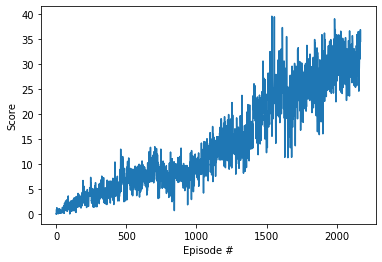

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [21]:
!ls -alrth checkpoint*.pth 

-rw-rw-r-- 1 ubuntu ubuntu 3.2M Jul  8 08:49 checkpoint.pth
-rw-rw-r-- 1 ubuntu ubuntu 3.2M Jul  8 08:53 checkpoint_768x1024.pth
